# Ejercicio 4 - Laplaciano

In [1]:
import cv2 as cv

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## Análisis de la aplicacion del Laplaciano
El operador laplaciano hace uso de la segunda derivada, detectando cambios agresivos en la imagen, es decir, las más altas frecuencias. Estas altas frecuencias se relacionan con los bordes de las imágenes, así que vamos a buscar cómo utilizar la información que nos brinda el laplaciano para resaltar los bordes. Observemos en el siguiente ejemplo en una dimensión cómo actúa el laplaciano:

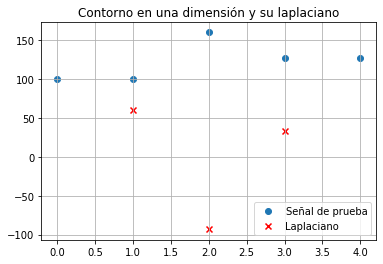

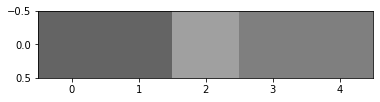

In [88]:
test_x = np.array([100, 100, 160, 127, 127])
indexes = np.array(range(1, len(test_x) - 1))
test_lap = test_x[indexes+1] + test_x[indexes-1] - 2*test_x[indexes]
plt.figure()
plt.title('Contorno en una dimensión y su laplaciano')
plt.scatter(range(len(test_x)),test_x, label='Señal de prueba')
plt.scatter(indexes, test_lap, color='r', label='Laplaciano', marker='x')
plt.legend(loc='lower right')
plt.grid()
plt.show()
plt.imshow(np.tile(test_x, 1).reshape(1,len(test_x)), cmap='gray', vmin=0, vmax=255)
plt.show()

Notamos que en el caso presentado, se tienen valores oscuros a la izquierda, claros al centro y gris a la derecha. Si queremos hacer más perceptible el contorno, querríamos que el oscuro sea más oscuro, el claro más claro y el gris de la derecha oscurecerlo para diferenciarlo del contorno claro.

Si le restamos el laplaciano a la señal original obtenemos exactamente el efecto descripto, lo cual se deduce del signo que tiene en cada punto.
Como tiene valores positivos para el oscuro y el gris, al restarlo se oscurecen estos puntos. Por otro lado, como es negativo para el claro, al restarlo lo hará más claro.

Observamos el efecto de restar el laplaciano:

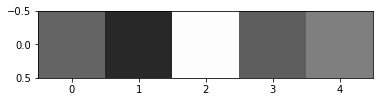

In [98]:
plt.imshow(np.tile(test_x - np.concatenate([[0], test_lap, [0]]), 1).reshape(1,len(test_x)), cmap='gray', vmin=0, vmax=255)
plt.show()

Como se había explicado, se logró el efecto deseado, dado que el contorno se hizo más apreciable y los puntos de la imagen lejanos al contorno no se vieron afectados.

## Kernel definitivo
Por lo explicado anteriormente, buscamos un kernel que de como resultado la señal con el laplaciano restado. Para ello, le restamos el kernel del laplaciano con las diagonales incluidas al kernel identidad:

$
K = 
\begin{pmatrix}
0 & 0 & 0\\ 
0 & 1 & 0\\ 
0 & 0 & 0
\end{pmatrix}
-
\begin{pmatrix}
1 & 1  & 1 \\ 
1 & -8 & 1\\ 
1 & 1  & 1
\end{pmatrix}
=
\begin{pmatrix}
-1 & -1  & -1 \\ 
-1 & 9 & -1\\ 
-1 & -1  & -1
\end{pmatrix}
$

Aplicando el kernel $K$ obtenido haremos la operación de resaltar los contornos.

### Carga de la imagen

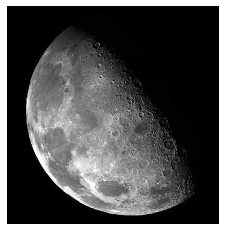

In [4]:
img = cv.imread('../resources/moon.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

## Aplicación del Kernel

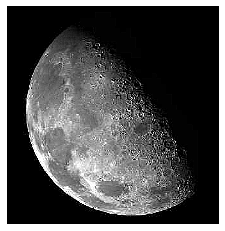

In [37]:
kernel = -np.ones((3,3))
kernel[1,1] = 9
laplacian = cv.filter2D(img, -1, kernel)

### Comparación de las imágenes

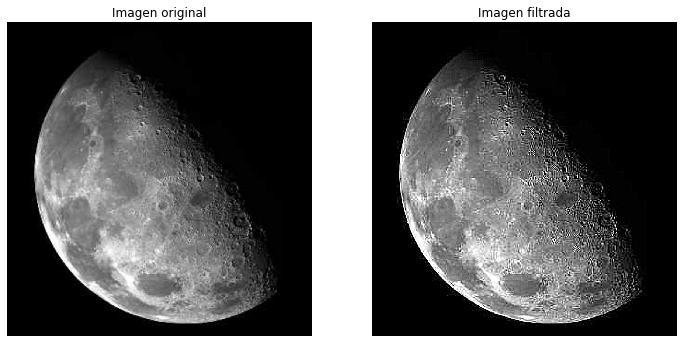

In [112]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagen original')
plt.subplot(1,2,2)
plt.imshow(laplacian, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagen filtrada')
plt.show()

Se puede observar cómo la imagen filtrada tiene los bordes mucho más resaltados que la imagen original, logrando el efecto esperado.